Various Algorithms Applied: Gaussian Naive Bayes, Decision Tree, Random Forest, Support Vector Machine, Logistic Regression.

Approach Used: I have applied various classification algorithms that are mentioned above on the KDD dataset and compare there results to build a predictive model.

Step 1 - Data Preprocessing:

In [1]:
%pip install pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


Importing libraries and reading features list from ‘kddcup.names’ file.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# reading features list 
with open("/Users/user/Documents/Study/2023-1/gr2/kdd1999/dataset/kddcup.names", 'r') as f: 
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

Appending columns to the dataset and adding a new column name ‘target’ to the dataset.

In [3]:
cols ="""duration, 
protocol_type, 
service, 
flag, 
src_bytes, 
dst_bytes, 
land, 
wrong_fragment, 
urgent, 
hot, 
num_failed_logins, 
logged_in, 
num_compromised, 
root_shell, 
su_attempted, 
num_root, 
num_file_creations, 
num_shells, 
num_access_files, 
num_outbound_cmds, 
is_host_login, 
is_guest_login, 
count, 
srv_count, 
serror_rate, 
srv_serror_rate, 
rerror_rate, 
srv_rerror_rate, 
same_srv_rate, 
diff_srv_rate, 
srv_diff_host_rate, 
dst_host_count, 
dst_host_srv_count, 
dst_host_same_srv_rate, 
dst_host_diff_srv_rate, 
dst_host_same_src_port_rate, 
dst_host_srv_diff_host_rate, 
dst_host_serror_rate, 
dst_host_srv_serror_rate, 
dst_host_rerror_rate, 
dst_host_srv_rerror_rate"""

columns =[] 
for c in cols.split(', '): 
	if(c.strip()): 
		columns.append(c.strip()) 

columns.append('target') 
print(len(columns)) 


42


Reading the ‘attack_types’ file.

In [4]:
with open("/Users/user/Documents/Study/2023-1/gr2/kdd1999/dataset/training_attack_types", 'r') as f: 
	print(f.read()) 


back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




Creating a dictionary of attack_types

In [5]:
attacks_types = { 
	'normal': 'normal', 
'back': 'dos', 
'buffer_overflow': 'u2r', 
'ftp_write': 'r2l', 
'guess_passwd': 'r2l', 
'imap': 'r2l', 
'ipsweep': 'probe', 
'land': 'dos', 
'loadmodule': 'u2r', 
'multihop': 'r2l', 
'neptune': 'dos', 
'nmap': 'probe', 
'perl': 'u2r', 
'phf': 'r2l', 
'pod': 'dos', 
'portsweep': 'probe', 
'rootkit': 'u2r', 
'satan': 'probe', 
'smurf': 'dos', 
'spy': 'r2l', 
'teardrop': 'dos', 
'warezclient': 'r2l', 
'warezmaster': 'r2l', 
} 


Reading the dataset(‘kddcup.data_10_percent’) and adding Attack Type feature in the training dataset where attack type feature has 5 distinct values i.e. dos, normal, probe, r2l, u2r.

In [6]:
path = "/Users/user/Documents/Study/2023-1/gr2/kdd1999/dataset/kddcup.data/kddcup.data"
df = pd.read_csv(path, names = columns) 

# Adding Attack Type column 
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]]) 
df.head() 


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,236,1228,0,0,0,0,...,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,233,2032,0,0,0,0,...,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.,normal


Finding missing values of all features.

In [7]:
df.isnull().sum()


duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [8]:
df['target'].value_counts()

target
smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: count, dtype: int64

In [9]:
df['Attack Type'].value_counts()

Attack Type
dos       3883370
normal     972781
probe       41102
r2l          1126
u2r            52
Name: count, dtype: int64

In [10]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

Finding Categorical Features

In [11]:
num_cols = df._get_numeric_data().columns 

cate_cols = list(set(df.columns)-set(num_cols)) 
cate_cols.remove('target') 
cate_cols.remove('Attack Type') 

cate_cols 


['protocol_type', 'service', 'flag']

CATEGORICAL FEATURES DISTRIBUTION

In [12]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

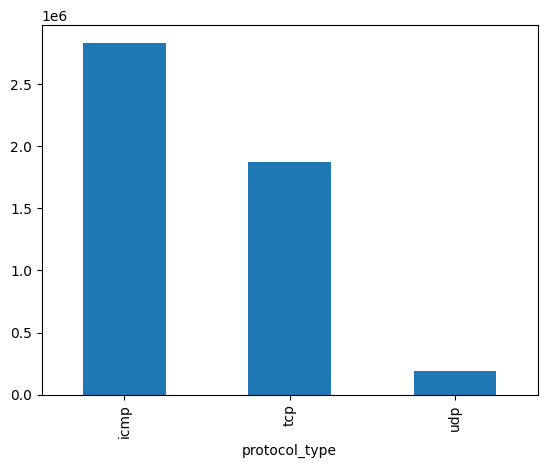

In [13]:
bar_graph('protocol_type')

Protocol type: We notice that ICMP is the most present in the used data, then TCP and almost 20000 packets of UDP type

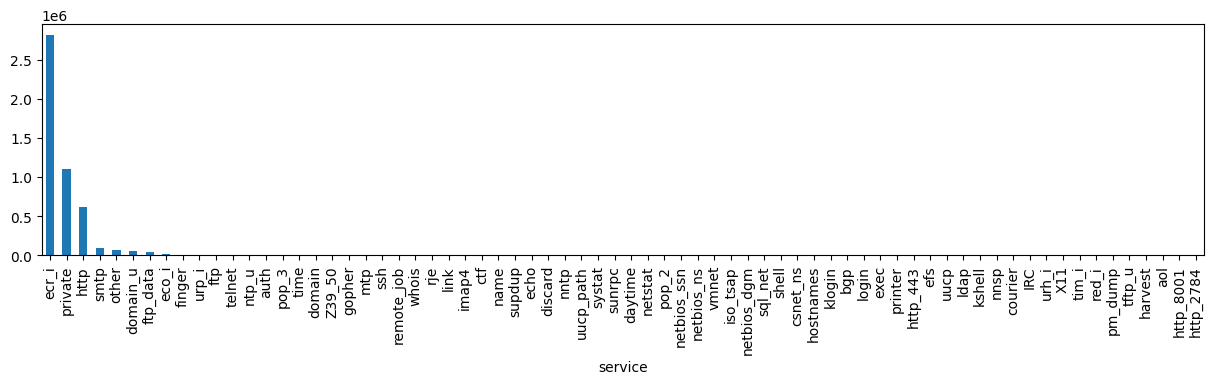

In [14]:
plt.figure(figsize=(15,3))
bar_graph('service')

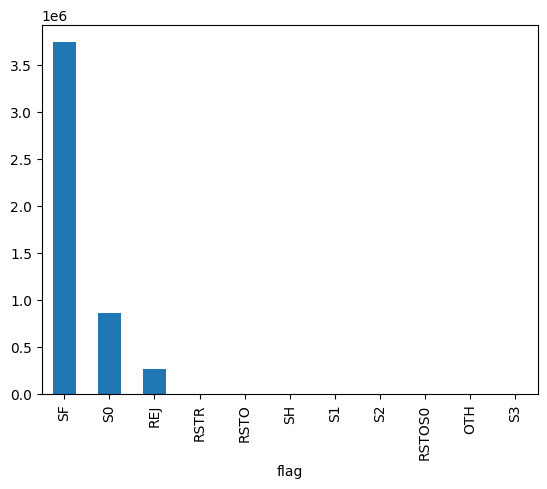

In [15]:
bar_graph('flag')

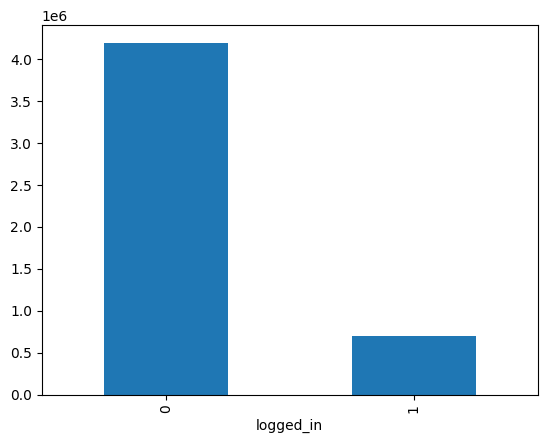

In [16]:
bar_graph('logged_in')

logged_in (1 if successfully logged in; 0 otherwise): We notice that just 70000 packets are successfully logged in.

TARGET FEATURE DISTRIBUTION

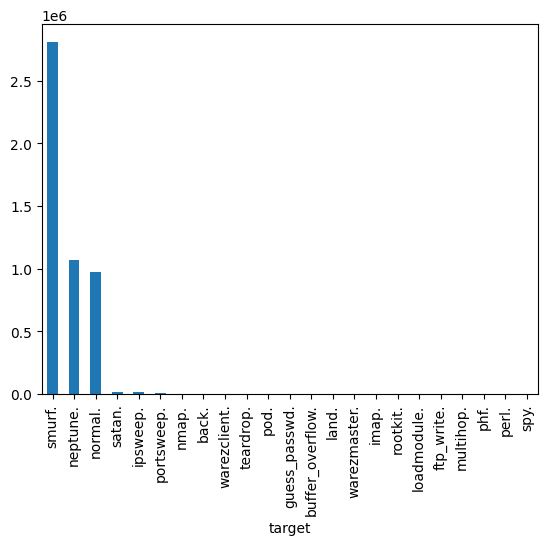

In [17]:
bar_graph('target')

Attack Type(The attack types grouped by attack, it's what we will predict)

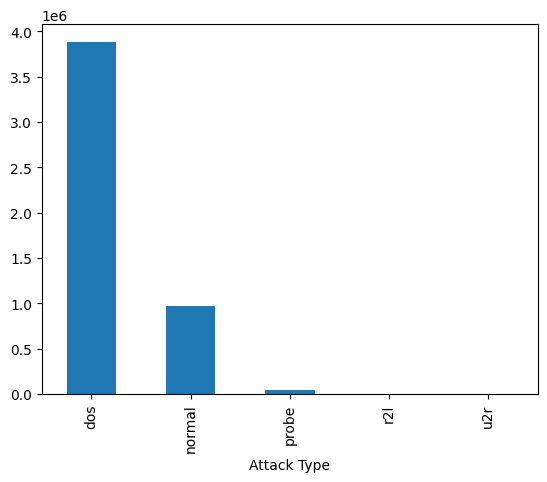

In [18]:
bar_graph('Attack Type')

In [19]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

Data Correlation – Find the highly correlated variables using heatmap and ignore them for analysis.

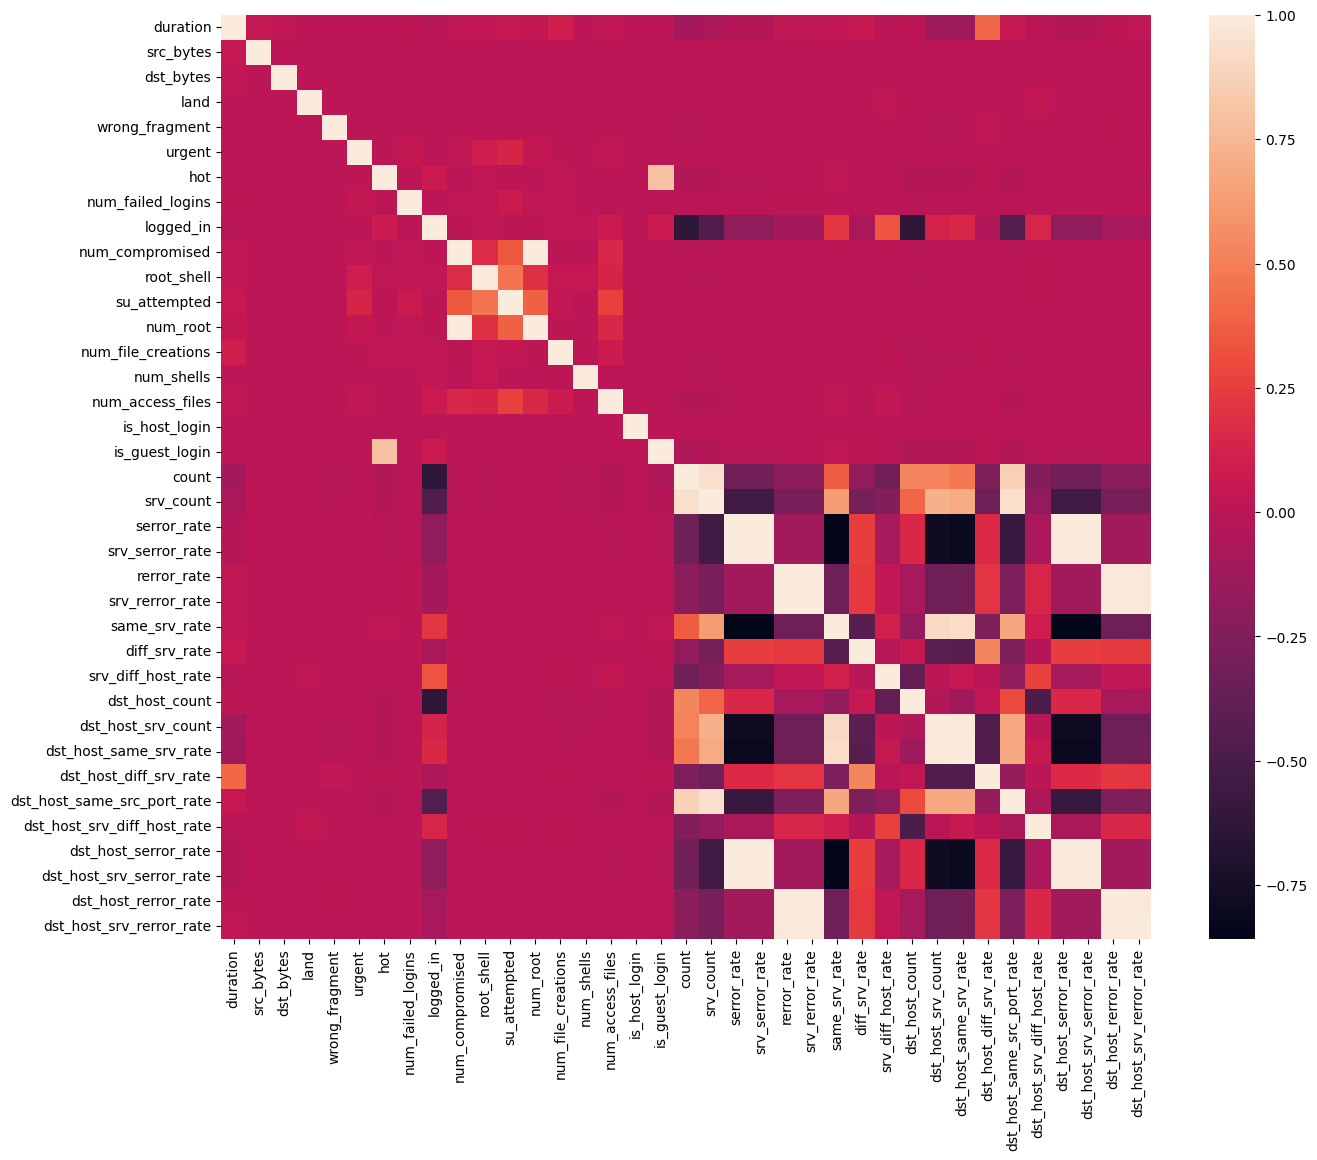

In [20]:
df = df.dropna(axis='columns')# drop columns with NaN 

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values 

# corr = df.corr() 

numeric_columns = df.select_dtypes(include=[np.number])  # Select only numeric columns

corr = numeric_columns.corr()  # Compute the correlation matrix for numeric columns

plt.figure(figsize =(15, 12)) 

sns.heatmap(corr) 

plt.show() 


In [21]:
df['num_root'].corr(df['num_compromised'])

0.9975798933487737

In [22]:
df['srv_serror_rate'].corr(df['serror_rate'])

0.9986924138664222

In [23]:
df['srv_count'].corr(df['count'])

0.9433902218808042

In [24]:
df['srv_rerror_rate'].corr(df['rerror_rate'])

0.9953719458068703

In [25]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])

0.9788464524225914

In [26]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])

0.998285955975919

In [27]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])

0.9869790678086942

In [28]:
df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])

0.9316213679073936

In [29]:
df['dst_host_srv_count'].corr(df['same_srv_rate'])

0.9075289446662882

In [30]:
df['dst_host_same_src_port_rate'].corr(df['srv_count'])

0.9473596471554561

In [31]:
df['dst_host_serror_rate'].corr(df['serror_rate'])

0.9990059376728406

In [32]:
df['dst_host_serror_rate'].corr(df['srv_serror_rate'])

0.9979417182527545

In [33]:
df['dst_host_srv_serror_rate'].corr(df['serror_rate'])

0.9982509415923287

In [34]:
df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])

0.9993917300385466

In [35]:
df['dst_host_rerror_rate'].corr(df['rerror_rate'])

0.9897555886509829

In [36]:
df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])

0.9855530624565976

In [37]:
df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])

0.9859781723139902

In [38]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])

0.9879088754808538

In [39]:
# This variable is highly correlated with num_compromised and should be ignored for analysis. 
#(Correlation = 0.9938277978738366) 
df.drop('num_root', axis = 1, inplace = True) 

# This variable is highly correlated with serror_rate and should be ignored for analysis. 
#(Correlation = 0.9983615072725952) 
df.drop('srv_serror_rate', axis = 1, inplace = True) 

# This variable is highly correlated with rerror_rate and should be ignored for analysis. 
#(Correlation = 0.9947309539817937) 
df.drop('srv_rerror_rate', axis = 1, inplace = True) 

# This variable is highly correlated with srv_serror_rate and should be ignored for analysis. 
#(Correlation = 0.9993041091850098) 
df.drop('dst_host_srv_serror_rate', axis = 1, inplace = True) 

# This variable is highly correlated with rerror_rate and should be ignored for analysis. 
#(Correlation = 0.9869947924956001) 
df.drop('dst_host_serror_rate', axis = 1, inplace = True) 

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis. 
#(Correlation = 0.9821663427308375) 
df.drop('dst_host_rerror_rate', axis = 1, inplace = True) 

# This variable is highly correlated with rerror_rate and should be ignored for analysis. 
#(Correlation = 0.9851995540751249) 
df.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True) 

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis. 
#(Correlation = 0.9865705438845669) 
df.drop('dst_host_same_srv_rate', axis = 1, inplace = True) 



In [40]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,http,SF,215,45076,0,0,0,0,...,1.0,0.0,0.0,0,0,0.0,0.00,0.0,normal.,normal
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1.0,0.0,0.0,1,1,0.0,1.00,0.0,normal.,normal
2,0,tcp,http,SF,236,1228,0,0,0,0,...,1.0,0.0,0.0,2,2,0.0,0.50,0.0,normal.,normal
3,0,tcp,http,SF,233,2032,0,0,0,0,...,1.0,0.0,0.0,3,3,0.0,0.33,0.0,normal.,normal
4,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,4,4,0.0,0.25,0.0,normal.,normal


In [41]:
df.shape

(4898431, 34)

In [42]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack Type'],
      dtype='object')

In [43]:
df['protocol_type'].value_counts()

protocol_type
icmp    2833545
tcp     1870598
udp      194288
Name: count, dtype: int64

Feature Mapping – Apply feature mapping on features such as : ‘protocol_type’ & ‘flag’.

In [44]:
# protocol_type feature mapping 
pmap = {'icmp':0, 'tcp':1, 'udp':2} 
df['protocol_type'] = df['protocol_type'].map(pmap) 


In [45]:
df['flag'].value_counts()

flag
SF        3744328
S0         869829
REJ        268874
RSTR         8094
RSTO         5344
SH           1040
S1            532
S2            161
RSTOS0        122
OTH            57
S3             50
Name: count, dtype: int64

In [46]:
# flag feature mapping 
fmap = {'SF':0, 'S0':1, 'REJ':2, 'RSTR':3, 'RSTO':4, 'SH':5, 'S1':6, 'S2':7, 'RSTOS0':8, 'S3':9, 'OTH':10} 
df['flag'] = df['flag'].map(fmap) 



In [47]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,http,0,215,45076,0,0,0,0,...,1.0,0.0,0.0,0,0,0.0,0.00,0.0,normal.,normal
1,0,1,http,0,162,4528,0,0,0,0,...,1.0,0.0,0.0,1,1,0.0,1.00,0.0,normal.,normal
2,0,1,http,0,236,1228,0,0,0,0,...,1.0,0.0,0.0,2,2,0.0,0.50,0.0,normal.,normal
3,0,1,http,0,233,2032,0,0,0,0,...,1.0,0.0,0.0,3,3,0.0,0.33,0.0,normal.,normal
4,0,1,http,0,239,486,0,0,0,0,...,1.0,0.0,0.0,4,4,0.0,0.25,0.0,normal.,normal


Remove irrelevant features such as ‘service’ before modelling

In [48]:
# Remove irrelevant features such as ‘service’ before modelling
df.drop('service', axis = 1, inplace = True) 


In [49]:
df.shape

(4898431, 33)

Step 2 - Modeling and Evaluation

Importing libraries and splitting the dataset

In [50]:
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [51]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 

In [52]:
# Splitting the dataset 
df = df.drop(['target', ], axis = 1) 
print(df.shape) 

# Target variable and train set 
y = df[['Attack Type']] 
X = df.drop(['Attack Type', ], axis = 1) 

sc = MinMaxScaler() 
X = sc.fit_transform(X) 

# Split test and train data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42) 
print(X_train.shape, X_test.shape) 
print(y_train.shape, y_test.shape) 


(4898431, 32)
(3281948, 31) (1616483, 31)
(3281948, 1) (1616483, 1)


In [53]:
X_test

array([[0.  , 1.  , 0.  , ..., 0.01, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 0.5 , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.5 , 0.  , ..., 0.  , 0.01, 0.01],
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ]])

In [54]:
y_test

,Attack Type
1445927,normal
4308571,dos
827437,normal
3134950,dos
2467014,dos
...,...
1537044,dos
1251607,dos
1020246,normal
1489996,dos


In [55]:
y_train

,Attack Type
4556539,normal
1023619,normal
2863644,dos
2050987,dos
3436970,normal
...,...
1136074,dos
1570006,dos
2234489,dos
4304572,dos


In [56]:
X_train

array([[0.00000000e+00, 5.00000000e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.71441307e-05, 5.00000000e-01, 0.00000000e+00, ...,
        5.00000000e-02, 1.00000000e-02, 1.00000000e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

Apply various machine learning classification algorithms such as Support Vector Machines, Random Forest, Naive Bayes, Decision Tree, Logistic Regression to create different models.

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import accuracy_score,f1_score
import time

import matplotlib.pyplot as plt

# Init models
models = {
    "Gaussian Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(criterion ="entropy", max_depth = 4),
    "Random Forest": RandomForestClassifier(n_estimators = 30),
    "Logistic Regression": LogisticRegression(max_iter = 1200000)
}

model_names = list(models.keys())
training_times = []
testing_times = []
training_accuracies = []
testing_accuracies = []
training_f1_scores = []
testing_f1_scores = []

for model_name, model in models.items():
    print(f"\nTraining and testing {model_name}:\n{'='*30}")

    # Train and evaluate model
    start_time_training = time.time()
    model.fit(X_train, y_train.values.ravel())
    end_time_training = time.time()
    
    start_time = time.time()
    y_pred = model.predict(X_test)
    end_time = time.time()

    # Save results
    training_times.append(end_time_training - start_time_training)
    testing_times.append(end_time - start_time)
    training_accuracies.append(accuracy_score(y_train, model.predict(X_train)))
    testing_accuracies.append(accuracy_score(y_test, y_pred))
    
    # Calculate F1 scores for each class
    training_f1 = f1_score(y_train, model.predict(X_train), average=None)
    testing_f1 = f1_score(y_test, y_pred, average=None)
    
    # Save F1 scores
    training_f1_scores.append(training_f1)
    testing_f1_scores.append(testing_f1)
    
    # Print results
    print(f"Training Time: {end_time_training - start_time_training:.4f} seconds")
    print(f"Testing Time: {end_time - start_time:.4f} seconds")
    print(f"Training Accuracy: {accuracy_score(y_train, model.predict(X_train)):.4%}")
    print(f"Testing Accuracy: {accuracy_score(y_test, y_pred):.4%}\n")
    print("Training F1 Score:")
    print(training_f1)
    print("\nTesting F1 Score:")
    print(testing_f1)



Training and testing Gaussian Naive Bayes:
Training Time: 3.7878 seconds
Testing Time: 1.1599 seconds
Training Accuracy: 92.5199%
Testing Accuracy: 92.4907%

Training F1 Score:
[0.98669358 0.77776478 0.29590244 0.08509415 0.00119123]

Testing F1 Score:
[0.98668657 0.77655168 0.29548119 0.0796975  0.00141791]

Training and testing Decision Tree:
Training Time: 6.3058 seconds
Testing Time: 0.1130 seconds
Training Accuracy: 99.6125%
Testing Accuracy: 99.6145%

Training F1 Score:
[0.99962252 0.99042628 0.77769454 0.         0.        ]

Testing F1 Score:
[0.99963747 0.99046887 0.77852946 0.         0.        ]

Training and testing Random Forest:
Training Time: 48.2448 seconds
Testing Time: 1.4920 seconds
Training Accuracy: 99.9964%
Testing Accuracy: 99.9864%

Training F1 Score:
[0.99999942 0.99990872 0.99810627 0.99475066 0.93333333]

Testing F1 Score:
[0.99999064 0.9996621  0.99497784 0.93277311 0.4       ]

Training and testing Logistic Regression:
Training Time: 25.7573 seconds
Testin

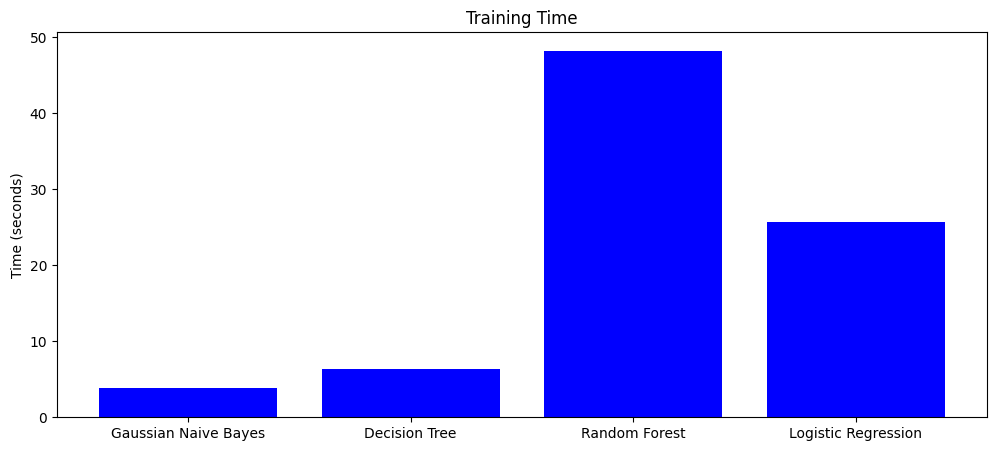

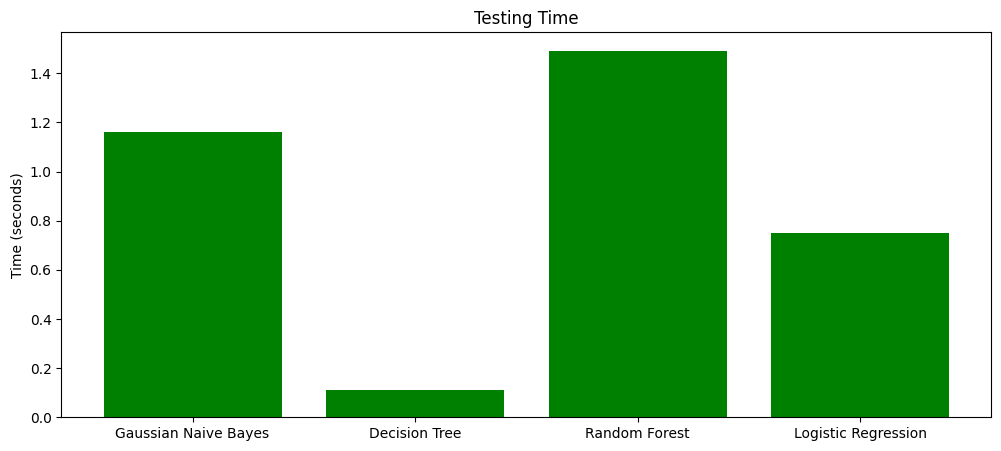

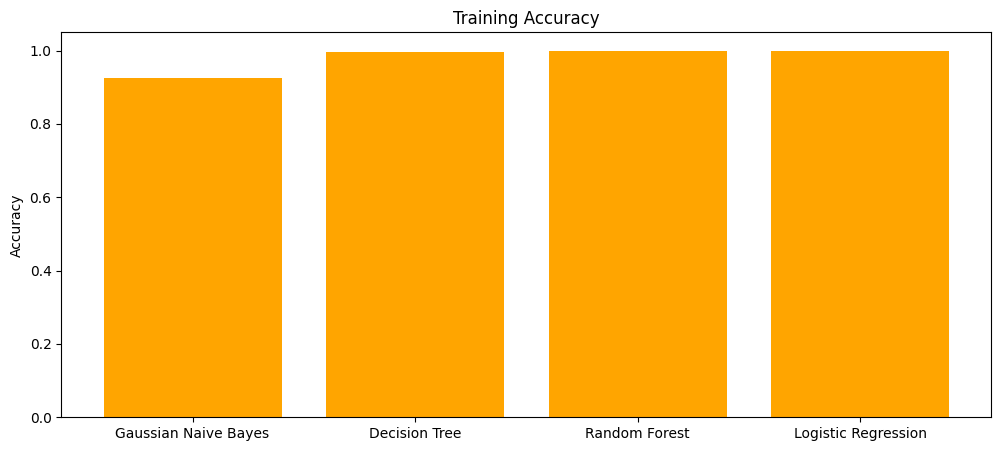

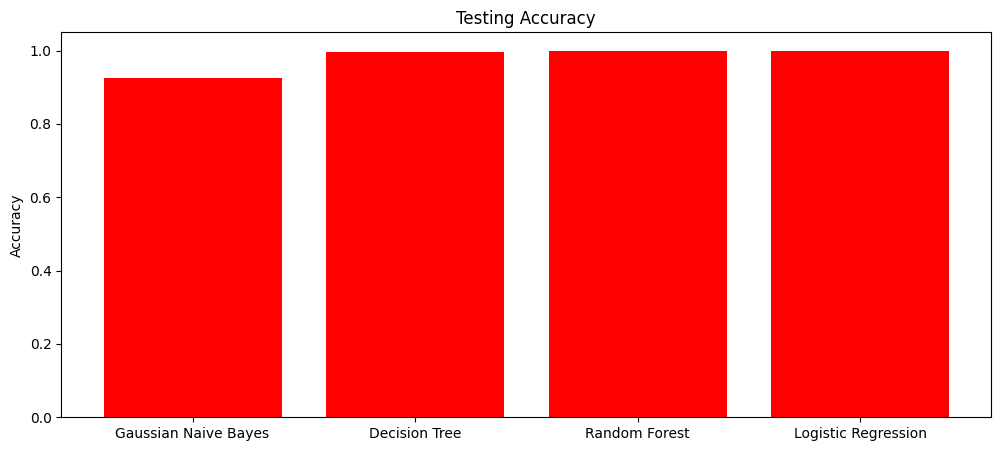

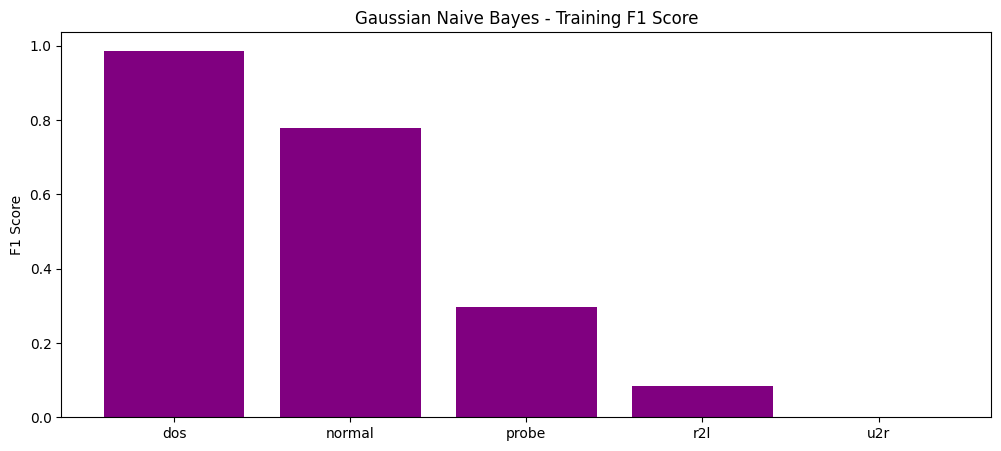

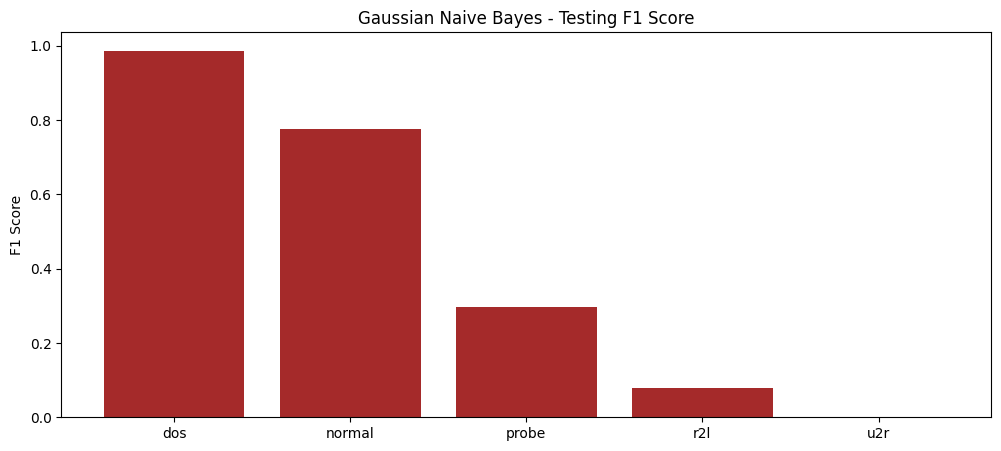

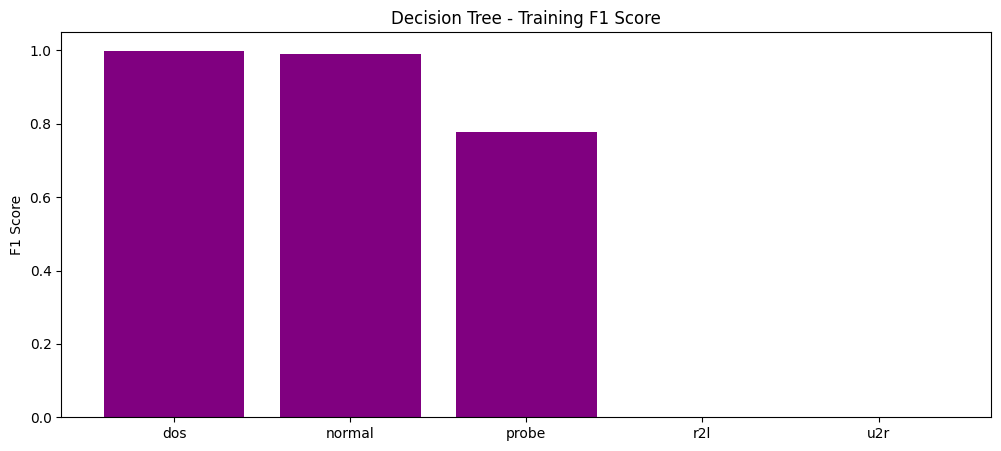

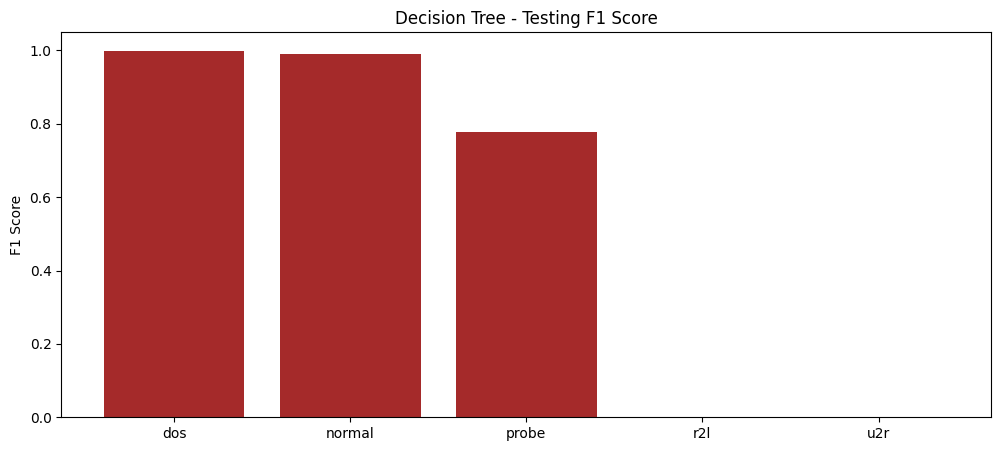

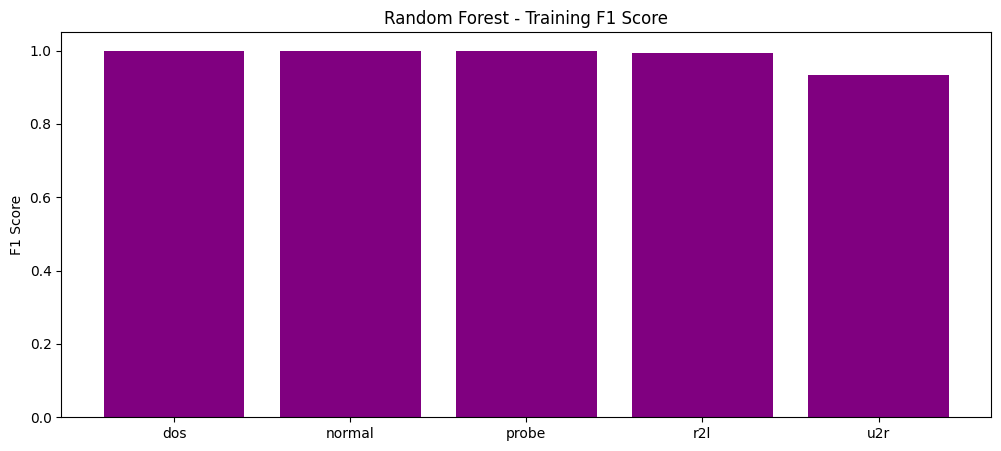

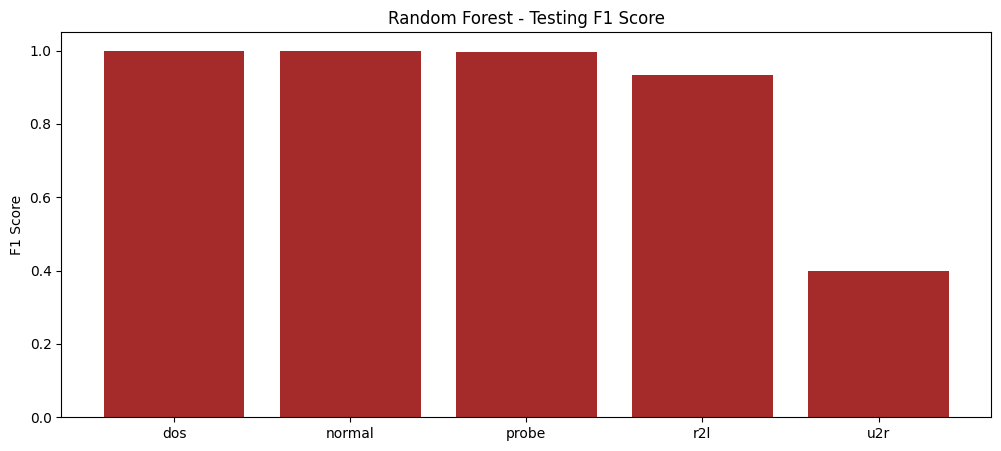

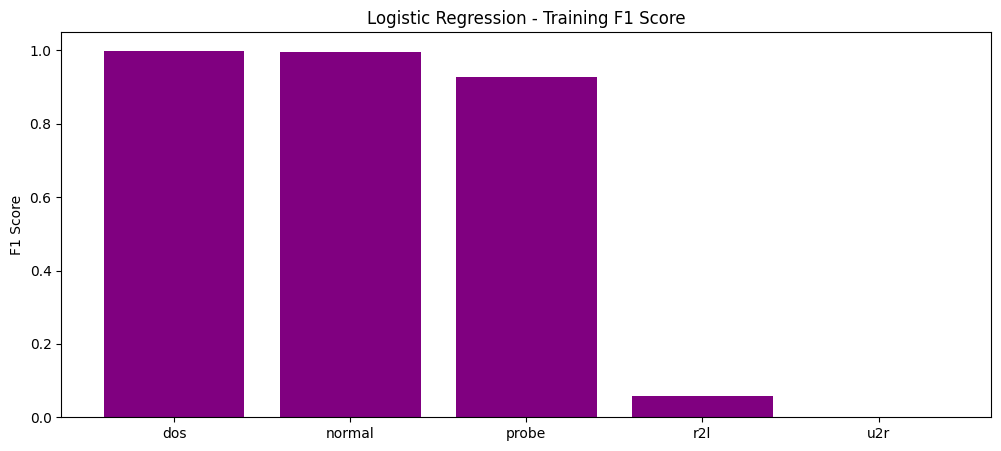

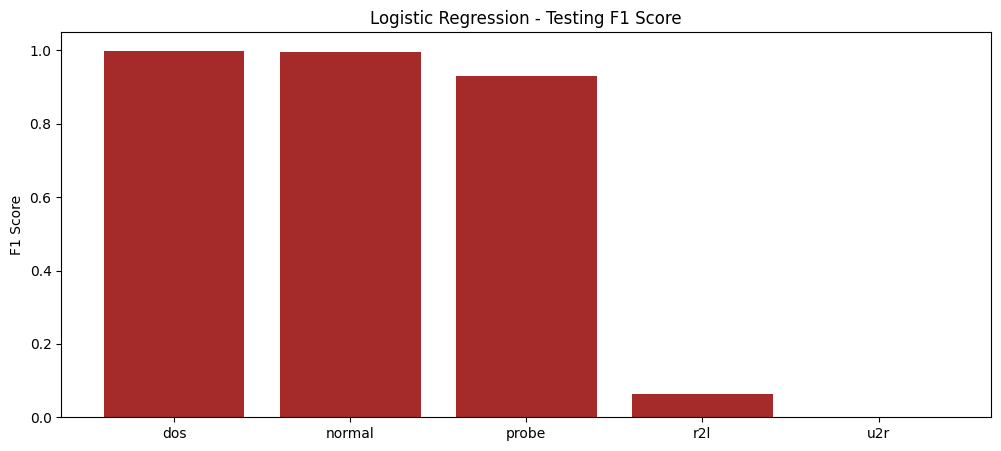

<Figure size 640x480 with 0 Axes>

In [59]:
# Plot training time of each model
fig, ax1 = plt.subplots(figsize=(12,5))
ax1.bar(model_names, training_times, color='blue')
ax1.set_title('Training Time')
ax1.set_ylabel('Time (seconds)')

plt.show()

# Plot testing time of each model
fig, ax2 = plt.subplots(figsize=(12,5))
ax2.bar(model_names, testing_times, color='green')
ax2.set_title('Testing Time')
ax2.set_ylabel('Time (seconds)')

plt.show()

# Plot training score of each model
fig, ax3 = plt.subplots(figsize=(12,5))
ax3.bar(model_names, training_accuracies, color='orange')
ax3.set_title('Training Accuracy')
ax3.set_ylabel('Accuracy')

plt.show()

# Plot testing score of each model
fig, ax4 = plt.subplots(figsize=(12,5))
ax4.bar(model_names, testing_accuracies, color='red')
ax4.set_title('Testing Accuracy')
ax4.set_ylabel('Accuracy')

plt.show()

# Add subplots for F1 scores
for i, model_name in enumerate(model_names):
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.bar(["dos", "normal", "probe", "r2l", "u2r"], training_f1_scores[i], color='purple')
    ax.set_title(f'{model_name} - Training F1 Score')
    ax.set_ylabel('F1 Score')
    plt.show()

    fig, ax = plt.subplots(figsize=(12, 5))
    ax.bar(["dos", "normal", "probe", "r2l", "u2r"], testing_f1_scores[i], color='brown')
    ax.set_title(f'{model_name} - Testing F1 Score')
    ax.set_ylabel('F1 Score')
    plt.show()

plt.tight_layout()
plt.show()
